<a href="https://colab.research.google.com/github/SWASTIK-CHAMOLA/College-AI-ML-LAB/blob/main/LAB6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Lab 6: Implement Dimensionality reduction using Principal Component Analysis (PCA) method.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Explained Variance Ratio: [0.32230289 0.26231883]


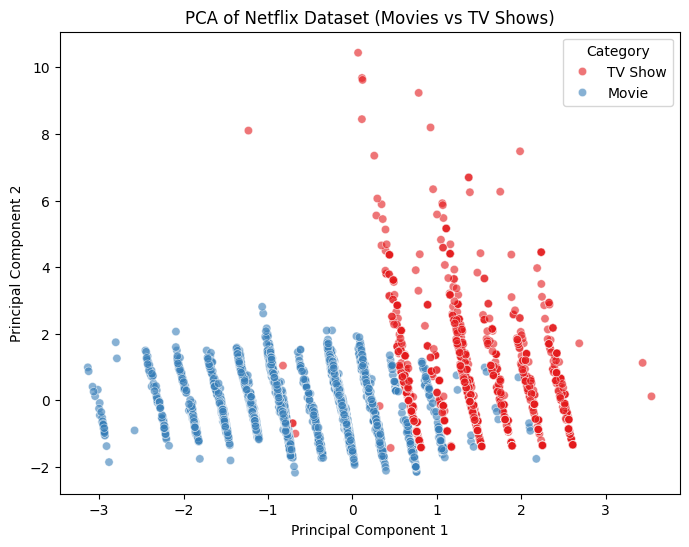

In [4]:
# Lab 6: PCA on Netflix Dataset
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/Netflix Dataset.csv"
df = pd.read_csv(file_path)

# -------------------------------
# Step 1: Preprocessing
# -------------------------------

# Convert Duration into numeric (minutes/seasons)
def convert_duration(val):
    if "min" in str(val):
        return int(val.replace(" min", ""))
    elif "Season" in str(val):
        return int(val.split()[0]) * 60   # Approximation
    return None

df['Duration_num'] = df['Duration'].apply(convert_duration)

# Encode categorical columns (Category, Rating, Country)
encoder = LabelEncoder()
df['Category_enc'] = encoder.fit_transform(df['Category'])
df['Rating_enc'] = encoder.fit_transform(df['Rating'].astype(str))
df['Country_enc'] = encoder.fit_transform(df['Country'].astype(str))

# Select features for PCA
features = ['Duration_num', 'Category_enc', 'Rating_enc', 'Country_enc']
X = df[features].dropna()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# Step 2: Apply PCA
# -------------------------------
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# -------------------------------
# Step 3: Visualization
# -------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df.loc[X.index,'Category'], palette="Set1", alpha=0.6)
plt.title("PCA of Netflix Dataset (Movies vs TV Shows)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Category")
plt.show()
